# 7 THE BEST ESTIMATOR CON ÁRBOL DE DECISIÓN (Fx)

Queremos poder interpretar los datos del modelo mediante una formula para exportarla. Vamos a poner a competir a los siguientes modelos.

- DecisiónTreeClassifier



## MODELAR ALGORITMO DE CLASIFICACIÓN

## IMPORTACIÓN DE PAQUETES

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Crear train and test
from sklearn.model_selection import train_test_split

#Modelos seleccionados por LazyPredict
from sklearn.tree import DecisionTreeClassifier

#Optimizar modelos
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import scikitplot as skplt

#Crear Pipeline

from sklearn.pipeline import Pipeline

import cloudpickle

import warnings
warnings.filterwarnings("ignore")

## IMPORTACIÓN DE DATOS

### CARGAR LOS DATOS

In [4]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon_oe.pickle')
df.head()

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe,target
0,0.0,0.0,1.0,1.0,1.0,0.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2.0,2.0,2.0,2.0,2.0,2.0,0
3,0.0,0.0,2.0,2.0,2.0,0.0,0
4,1.0,1.0,2.0,2.0,2.0,1.0,0


## SEPARAR PREDICTORAS Y TARGET

In [5]:
x = df.drop(columns= 'target').copy()
y = df.target.copy()

## RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [6]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 42)

## MODELIZAR CON ALGORITMO SIN HIPERPARÁMETROS.

### MODELIZAR SOBRE EL MODELO BASE 

#### Instanciar modelo

In [93]:
modelo = DecisionTreeClassifier(random_state=42)

#### Entrenar modelo

In [94]:
modelo.fit(train_x,train_y)

DecisionTreeClassifier(random_state=42)

#### Predecir con datos de validación

In [95]:
pred = modelo.predict_proba(val_x)[:,1]
pred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.])

#### Evaluar con datos de validación

In [10]:
t_roc_auc = roc_auc_score(val_y, pred)
t_accuracy = accuracy_score(val_y, pred)
t_report = classification_report(val_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         7

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



#### Importación de las variables

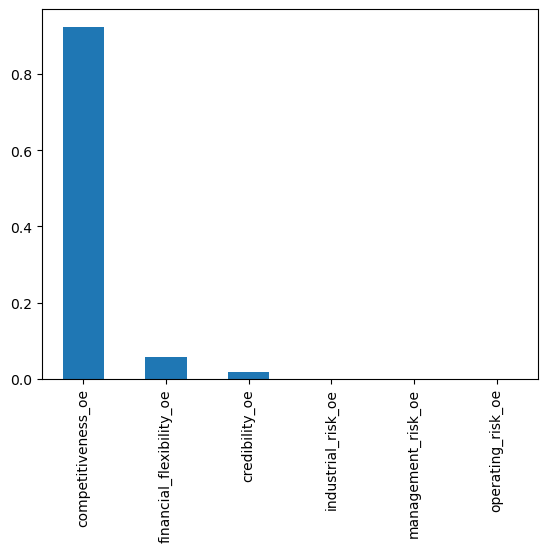

In [11]:
pd.Series(modelo.feature_importances_,index = val_x.columns).sort_values(ascending = False).plot(kind = 'bar');

#### Árbol de interpretación

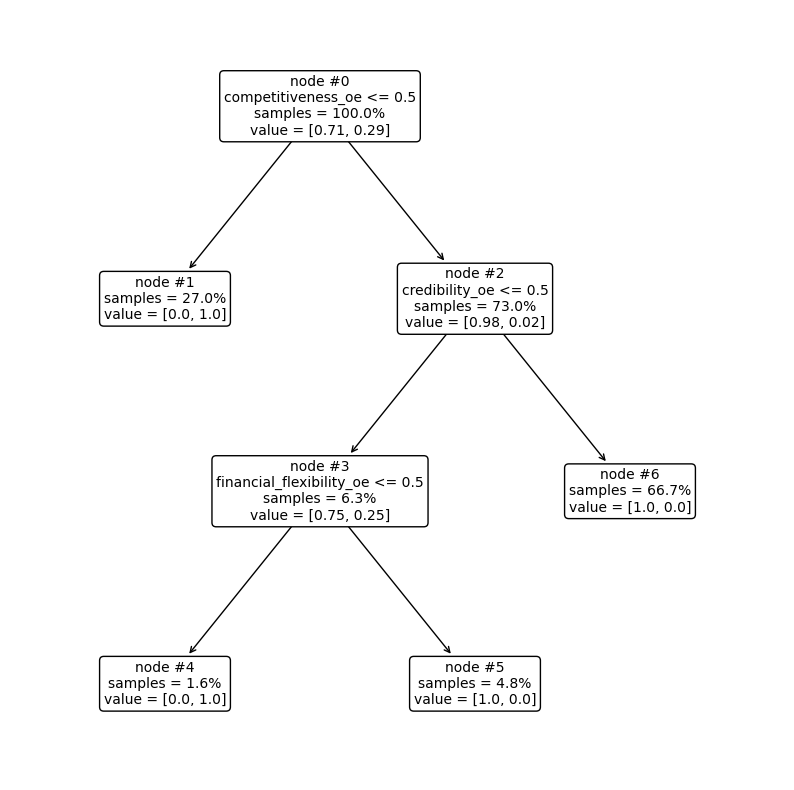

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,10))

plot_tree(modelo,
          feature_names= val_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2,
          fontsize= 10);

## MODELIZAR CON ALGORITMO CON HIPERPARÁMETROS

### INSTANCIAR EL MODELO

In [90]:
modelo = DecisionTreeClassifier(random_state= 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [24]:
grid = {
        'criterion': ['gini', 'entropy'],             # Criterio de selección de características
        'splitter': ['best', 'random'],              # Estrategia para dividir nodos
        'max_depth': [None, 3, 4, 5, 10, 15],          # Profundidad máxima del árbol
        'min_samples_split': [2, 5, 10],            # Número mínimo de muestras requeridas para dividir un nodo
        'min_samples_leaf': [1, 2, 4, 8],           # Número mínimo de muestras requeridas en cada hoja
        'max_features': ['auto', 'sqrt', 'log2'],    # Número máximo de características a considerar para la mejor división
        'max_leaf_nodes': [None, 10, 20, 30, 40],    # Número máximo de nodos hoja permitidos en el árbol
        'random_state': [42]                         # Semilla aleatoria para reproducibilidad
        }

### OPTIMIZAR LOS HIPERPARÁMETROS

In [40]:
grid_search = GridSearchCV(estimator= modelo,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           n_jobs= -1,
                           verbose=0)


In [ ]:
modelo_p = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,...,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1755,0.000202,0.000405,0.007800,0.000395,gini,10,log2,30,1,5,...,random,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",1.0,1.0,1.0,0.925926,1.0,0.985185,0.02963,1
99,0.002803,0.003492,0.005267,0.003423,gini,None,auto,40,1,5,...,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",1.0,1.0,1.0,0.925926,1.0,0.985185,0.02963,1
1827,0.008197,0.000406,0.001599,0.003198,gini,15,auto,10,1,5,...,random,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",1.0,1.0,1.0,0.925926,1.0,0.985185,0.02963,1
101,0.001902,0.003804,0.004796,0.003916,gini,None,auto,40,1,10,...,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",1.0,1.0,1.0,0.925926,1.0,0.985185,0.02963,1
1011,0.005598,0.003197,0.003999,0.007999,gini,4,log2,20,1,5,...,random,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",1.0,1.0,1.0,0.925926,1.0,0.985185,0.02963,1


In [ ]:
print('Best Estimator:', modelo.best_estimator_)
print('\nBest Params:', modelo.best_params_)
print('\nBest Score:', modelo.best_score_)

Best Estimator: DecisionTreeClassifier(max_features='auto', min_samples_split=10,
                       random_state=42, splitter='random')

Best Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}

Best Score: 0.9851851851851852


#### PREDECIR SOBRE VALIDACIÓN

In [69]:
predv1 = modelo_p.best_estimator_.predict(val_x)
predv1_p = modelo_p.best_estimator_.predict_proba(val_x)[:,1]

#### EVALUAR SOBRE LA VALIDACIÓN

In [70]:
v_roc_auc_proba = roc_auc_score(val_y, predv1_p)
v_roc_auc = roc_auc_score(val_y, predv1)
v_accuracy = accuracy_score(val_y, predv1)
v_report = classification_report(val_y, predv1)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 1.0
Roc AUC: 1.0
Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         7

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



#### Importación de las variables

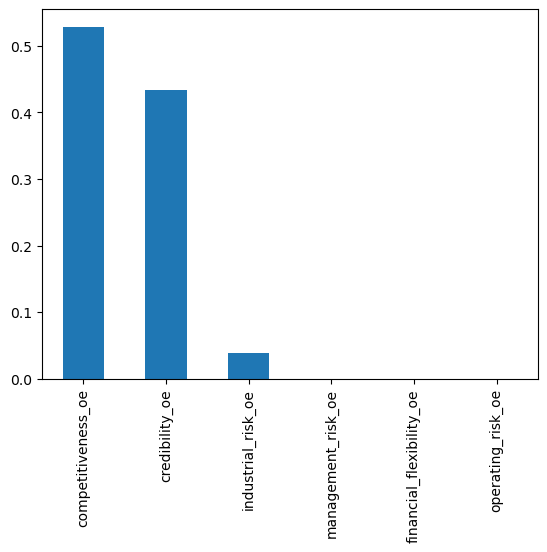

In [ ]:
pd.Series(modelo_p.best_estimator_.feature_importances_,index = val_x.columns).sort_values(ascending = False).plot(kind = 'bar');

#### Árbol de interpretación

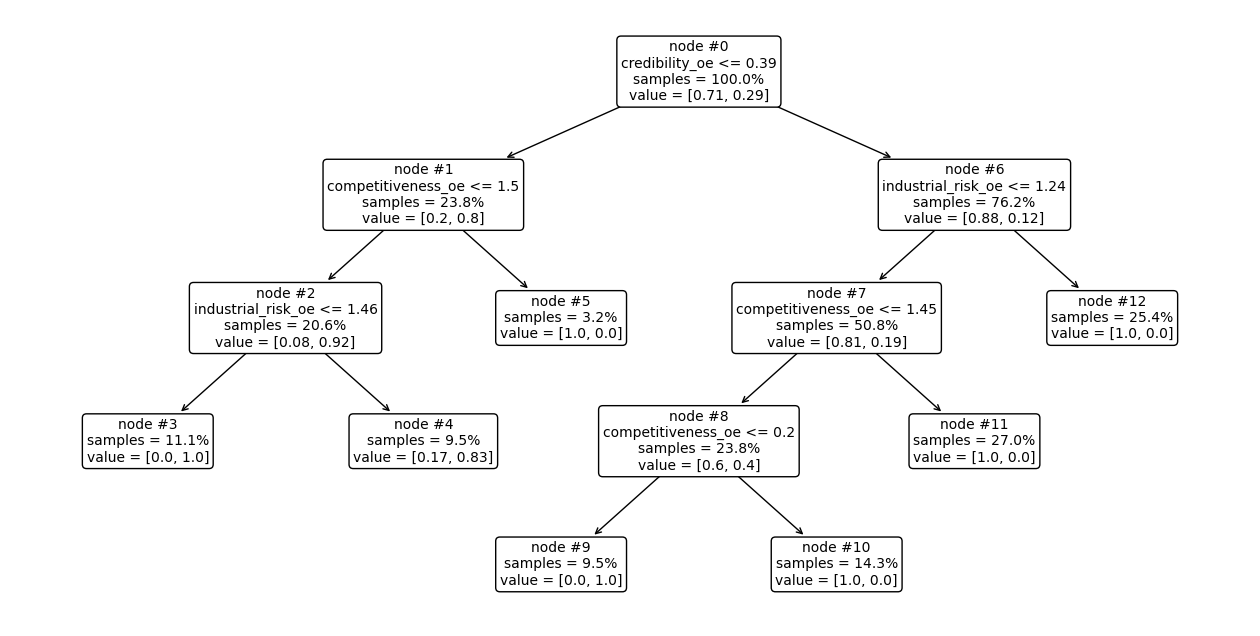

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (16,8))

plot_tree(modelo_p.best_estimator_,
          feature_names= val_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2,
          fontsize= 10);

## REPORTING DE LOS MODELOS

### Matrix de Confusión

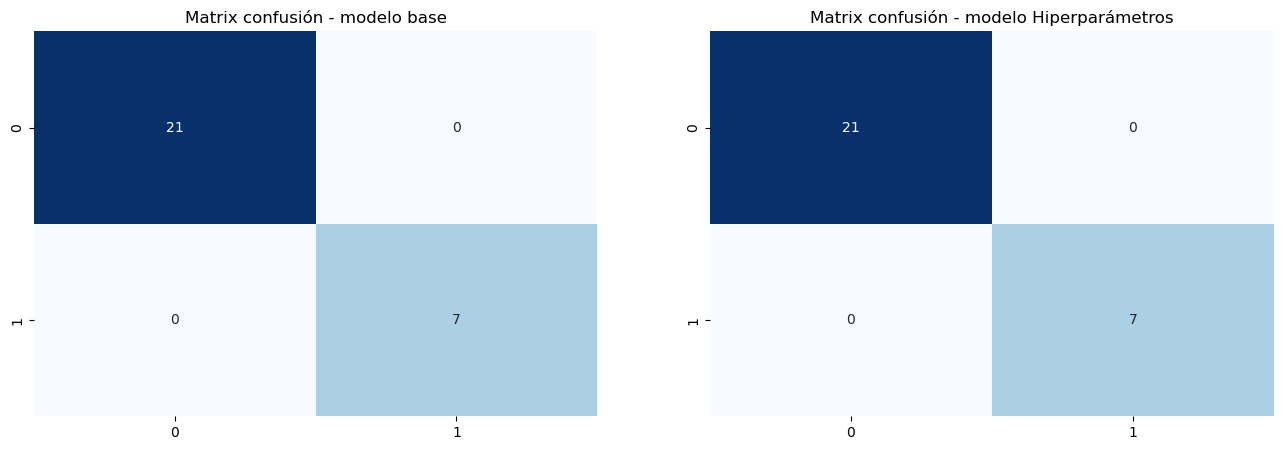

<Figure size 500x500 with 0 Axes>

In [86]:
# Crear subplots
f, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flat

# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)
cmv1 = confusion_matrix(val_y,predv1)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax[0])
sns.heatmap(cmv1, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax[1])
ax[0].set_title('Matrix confusión - modelo base')
ax[1].set_title('Matrix confusión - modelo Hiperparámetros');

### Precision-Recall

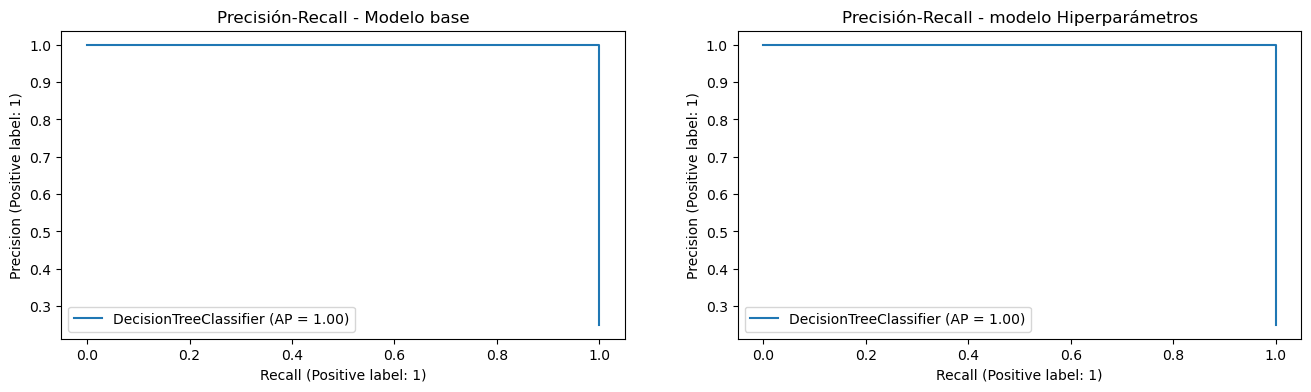

In [104]:
f, ax = plt.subplots(1, 2, figsize = (16, 4))
ax.flat

PrecisionRecallDisplay.from_estimator(modelo, val_x, val_y, ax= ax[0])
PrecisionRecallDisplay.from_estimator(modelo_p.best_estimator_, val_x, val_y, ax= ax[1])


ax[0].set_title('Precisión-Recall - Modelo base')
ax[1].set_title('Precisión-Recall - modelo Hiperparámetros');

### UMBRAL DE CORTE PRECISIÓN-RECALL

El mejor best_threshold: 1.0
El mejor best_threshold: 0.8333333333333334


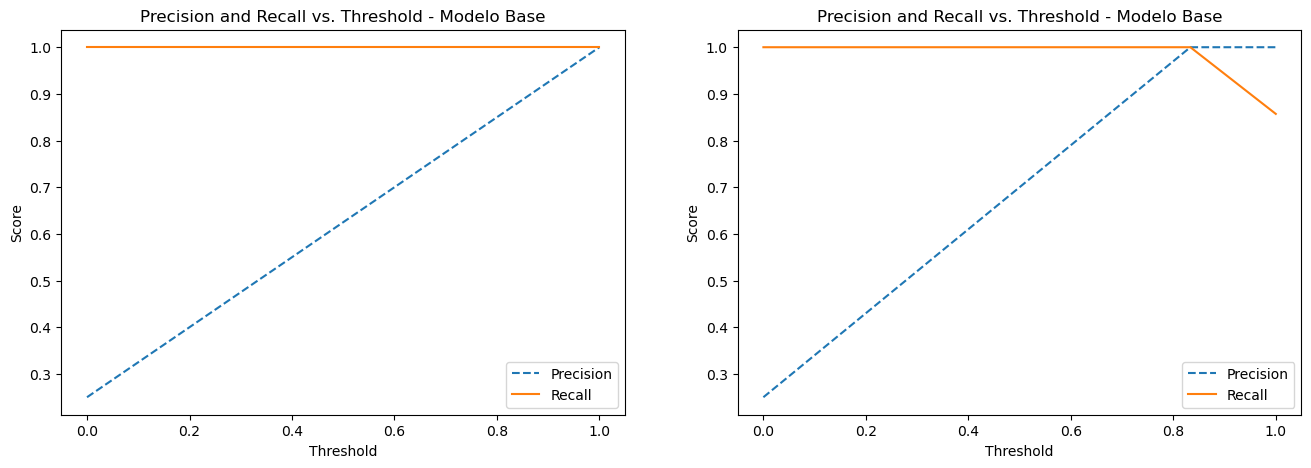

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [130]:
#Función para calcular el precisión y recall de cada gráfica
def precision_recall(y, pred):
    result = []
    result = precision_recall_curve(y, pred)
    return result

# Calcula la curva de precisión y recall para diferentes umbrales de corte
umbral = precision_recall(val_y, pred)
umbralv1 = precision_recall(val_y, predv1_p)

#Creamos los rejilla de los gráficos
f, ax = plt.subplots(1,2, figsize = (16,5))
ax.flat 

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
ax[0].plot(umbral[2], umbral[0][:-1], label='Precision', linestyle='--')
ax[0].plot(umbral[2], umbral[1][:-1], label='Recall', linestyle='-')
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Score')
ax[0].legend()
ax[0].set_title('Precision and Recall vs. Threshold - Modelo Base')

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
ax[1].plot(umbralv1[2], umbralv1[0][:-1], label='Precision', linestyle='--')
ax[1].plot(umbralv1[2], umbralv1[1][:-1], label='Recall', linestyle='-')
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Score')
ax[1].legend()
ax[1].set_title('Precision and Recall vs. Threshold - Modelo Base');

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)

precision, recall, thresholds = umbral
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

precision, recall, thresholds = umbralv1
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold);

### ROC Chart

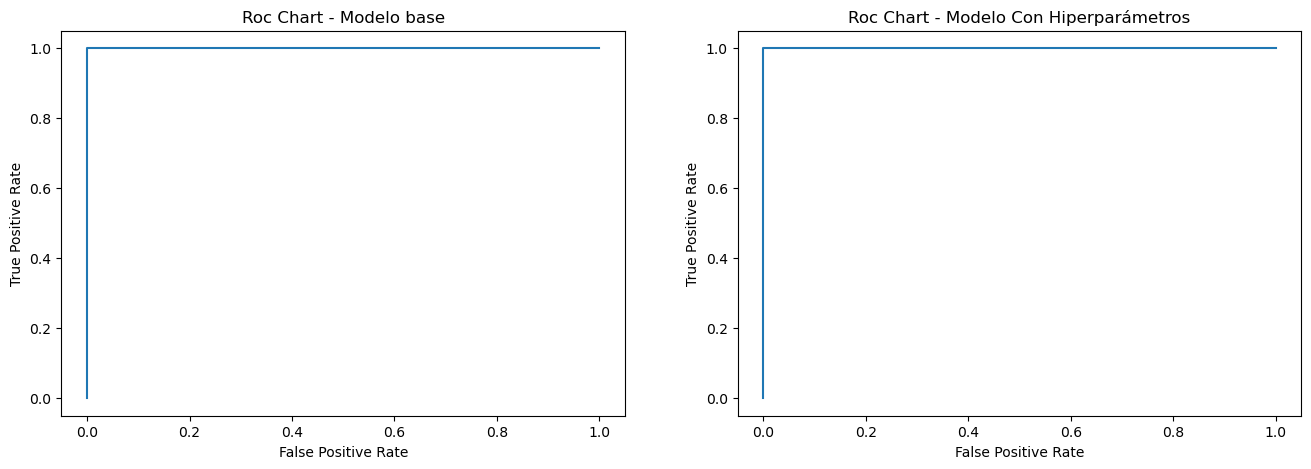

In [140]:
#Creamos la rejilla del gráfico
f, ax = plt.subplots(1, 2, figsize = (16,5))
ax.flat


#Calculamos Roc Chart del modelo base
y_score = modelo.predict_proba(val_x)[:,1]
fpr, tpr, _ = roc_curve(val_y, y_score, pos_label=modelo.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax= ax[0])
ax[0].set_title('Roc Chart - Modelo base')

#Calculamos Roc Chart del modelo con hiperparámetros
y_score = modelo_p.best_estimator_.predict_proba(val_x)[:,1]
fpr, tpr, _ = roc_curve(val_y, y_score, pos_label=modelo_p.best_estimator_.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax= ax[1])
ax[1].set_title('Roc Chart - Modelo Con Hiperparámetros');


## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el estimador con el modelo base

In [145]:
modelo

DecisionTreeClassifier(random_state=42)

In [147]:
version_estimator = '_7_v0'
m_best_estimator = str(modelo)
m_best_estimator = m_best_estimator.split('(')[0]
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo, file)

#### Guardar el estimador con el modelo con hiperparámetros

In [148]:
version_estimator = '_7_v1'
m_best_estimator = str(modelo_p.best_estimator_)
m_best_estimator = m_best_estimator.split('(')[0]
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_p, file)

**CONCLUSIÓN**: Los dos modelos tienen muy buenos resultados con los datos de validación. El modelo v2 tiene una diversificación más amplia y podría tender a sobre ajustarse. El modelo base puede tender a generalizar los resultados. Pero basa el resultado solo en una variable.

**PRÓXIMOS PASOS:**

Realizaremos el modelo definitivo con este modelo. Si detectamos que el modelo está sobre ajustado, haremos un nuevo modelo con  hiperparámetros para evitar el sobre ajuste y evaluaremos nuevamente el modelo.